# 9.5 컨텐츠 기반 필터링 실습 – TMDB 5000 Movie Dataset

In [4]:
import pandas as pd
import numpy as np
import warnings; warnings.filterwarnings('ignore')

movies = pd.read_csv('./data/tmdb_5000_movies.csv')
print(movies.shape)
movies.head(3)

(4803, 20)


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466


In [7]:
movies_df = movies[['id','title', 'genres', 'vote_average', 'vote_count',
                 'popularity', 'keywords', 'overview']]
movies_df.shape

(4803, 8)

In [8]:
pd.set_option('max_colwidth', 100)
movies_df[['genres','keywords']][:1]

,genres,keywords
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""name"": ""Fantasy""}, {...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"": 2964, ""name"": ""future""}, {""id"": 3386, ""name"": ""sp..."


In [9]:
from ast import literal_eval

movies_df['genres'] = movies_df['genres'].apply(literal_eval)
movies_df['keywords'] = movies_df['keywords'].apply(literal_eval)

In [10]:
movies_df['genres'] = movies_df['genres'].apply(lambda x : [ y['name'] for y in x])
movies_df['keywords'] = movies_df['keywords'].apply(lambda x : [ y['name'] for y in x])
movies_df[['genres', 'keywords']][:1]

,genres,keywords
0,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colony, society, space travel, futuristic, romance, spa..."


In [26]:
genre_mat

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

# CountVectorizer를 적용하기 위해 공백문자로 word 단위가 구분되는 문자열로 변환. 
movies_df['genres_literal'] = movies_df['genres'].apply(lambda x : (' ').join(x))
count_vect = CountVectorizer(min_df=0, ngram_range=(1,2))
genre_mat = count_vect.fit_transform(movies_df['genres_literal'])
print(genre_mat.shape)

(4803, 276)


In [32]:
count_vect.vocabulary_

{'action': 0,
 'adventure': 16,
 'fantasy': 124,
 'science': 232,
 'fiction': 138,
 'action adventure': 1,
 'adventure fantasy': 24,
 'fantasy science': 135,
 'science fiction': 233,
 'fantasy action': 125,
 'crime': 64,
 'adventure crime': 20,
 'drama': 90,
 'thriller': 234,
 'action crime': 4,
 'crime drama': 68,
 'drama thriller': 106,
 'adventure science': 29,
 'animation': 33,
 'family': 109,
 'animation family': 38,
 'fantasy family': 130,
 'action science': 12,
 'adventure action': 17,
 'action thriller': 13,
 'thriller crime': 238,
 'western': 265,
 'adventure western': 32,
 'adventure family': 23,
 'family fantasy': 115,
 'fiction action': 139,
 'action fantasy': 7,
 'comedy': 44,
 'action comedy': 3,
 'comedy science': 59,
 'adventure drama': 22,
 'drama action': 91,
 'romance': 214,
 'drama romance': 104,
 'romance thriller': 228,
 'thriller action': 235,
 'fiction thriller': 150,
 'adventure thriller': 30,
 'fantasy adventure': 126,
 'family adventure': 111,
 'adventure com

In [33]:
print(genre_mat)

  (0, 0)	1
  (0, 1)	1
  (0, 16)	1
  (0, 24)	1
  (0, 124)	1
  (0, 135)	1
  (0, 138)	1
  (0, 232)	1
  (0, 233)	1
  (1, 0)	1
  (1, 16)	1
  (1, 24)	1
  (1, 124)	1
  (1, 125)	1
  (2, 0)	1
  (2, 1)	1
  (2, 16)	1
  (2, 20)	1
  (2, 64)	1
  (3, 0)	1
  (3, 4)	1
  (3, 64)	1
  (3, 68)	1
  (3, 90)	1
  (3, 106)	1
  :	:
  (4796, 144)	1
  (4796, 232)	1
  (4796, 233)	1
  (4796, 234)	1
  (4797, 153)	1
  (4797, 157)	1
  (4797, 234)	1
  (4798, 0)	1
  (4798, 4)	1
  (4798, 64)	1
  (4798, 78)	1
  (4798, 234)	1
  (4799, 44)	1
  (4799, 58)	1
  (4799, 214)	1
  (4800, 44)	1
  (4800, 50)	1
  (4800, 90)	1
  (4800, 104)	1
  (4800, 182)	1
  (4800, 214)	1
  (4800, 229)	1
  (4800, 250)	1
  (4800, 251)	1
  (4802, 80)	1


In [12]:
from sklearn.metrics.pairwise import cosine_similarity

## 각 영화간의 유사도를 장르를 기반으로 측정
genre_sim = cosine_similarity(genre_mat, genre_mat)
print(genre_sim.shape)
print(genre_sim[:2])

(4803, 4803)
[[1.         0.59628479 0.4472136  ... 0.         0.         0.        ]
 [0.59628479 1.         0.4        ... 0.         0.         0.        ]]


In [29]:
genre_mat[0]

<1x276 sparse matrix of type '<class 'numpy.int64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [34]:
genre_sim.argsort()

array([[2401, 3037, 3038, ...,  813, 3494,    0],
       [2401, 3067, 3069, ...,  129,    1,  262],
       [2401, 2999, 3000, ..., 1542, 1740,    2],
       ...,
       [   0, 2230, 2229, ..., 1895, 3809, 4800],
       [   0, 3205, 3204, ..., 1596, 1594, 4802],
       [   0, 3141, 3140, ..., 4521, 4710, 4802]], dtype=int64)

In [36]:
genre_sim_sorted_ind = genre_sim.argsort()[:, ::-1] #take everything in this dimension but backwards."

print(genre_sim_sorted_ind.shape)
print(genre_sim_sorted_ind[0])

(4803, 4803)
[   0 3494  813 ... 3038 3037 2401]


0행은 3494행과의 유사도가 가장 높고 2401행과의 유사도가 가장 낮음

In [52]:
def find_sim_movie(df, sorted_ind, title_name, top_n=10):
    
    # 인자로 입력된 movies_df DataFrame에서 'title' 컬럼이 입력된 title_name 값인 DataFrame추출
    title_movie = df[df['title'] == title_name] #행 1개, 일부 2개
   
    title_index = title_movie.index.values # title_named을 가진 DataFrame의 행 index 반환
    similar_indexes = sorted_ind[title_index, :(top_n)] # 행별 장르 유사도에서 해당 title과 가장 유사도 높은 top_n 개의 행 index 추출
    print('장르유사도 top 10 영화 index:', similar_indexes)    
    similar_indexes = similar_indexes.reshape(-1) # 1차원 array로 변경
    
    return df.iloc[similar_indexes]

In [56]:
similar_movies = find_sim_movie(movies_df, genre_sim_sorted_ind, 'The Godfather',10)
similar_movies[['title', 'vote_average']]

장르유사도 top 10 영화 index: [[2731 1243 3636 1946 2640 4065 1847 4217  883 3866]]


,title,vote_average
2731,The Godfather: Part II,8.3
1243,Mean Streets,7.2
3636,Light Sleeper,5.7
1946,The Bad Lieutenant: Port of Call - New Orleans,6.0
2640,Things to Do in Denver When You're Dead,6.7
4065,Mi America,0.0
1847,GoodFellas,8.2
4217,Kids,6.8
883,Catch Me If You Can,7.7
3866,City of God,8.1


유사도 낮아보이거나 평점이 0인 영화도 있음 => 개선 필요

장르 뿐 아니라 평점 변수도 활용. 

평점을 매긴 관객수도 고려해야 왜곡을 막을 수 있음

In [16]:
movies_df[['title','vote_average','vote_count']].sort_values('vote_average', ascending=False)[:10]

,title,vote_average,vote_count
3519,Stiff Upper Lips,10.0,1
4247,Me You and Five Bucks,10.0,2
4045,"Dancer, Texas Pop. 81",10.0,1
4662,Little Big Top,10.0,1
3992,Sardaarji,9.5,2
2386,One Man's Hero,9.3,2
2970,There Goes My Baby,8.5,2
1881,The Shawshank Redemption,8.5,8205
2796,The Prisoner of Zenda,8.4,11
3337,The Godfather,8.4,5893


가중 평점 사용
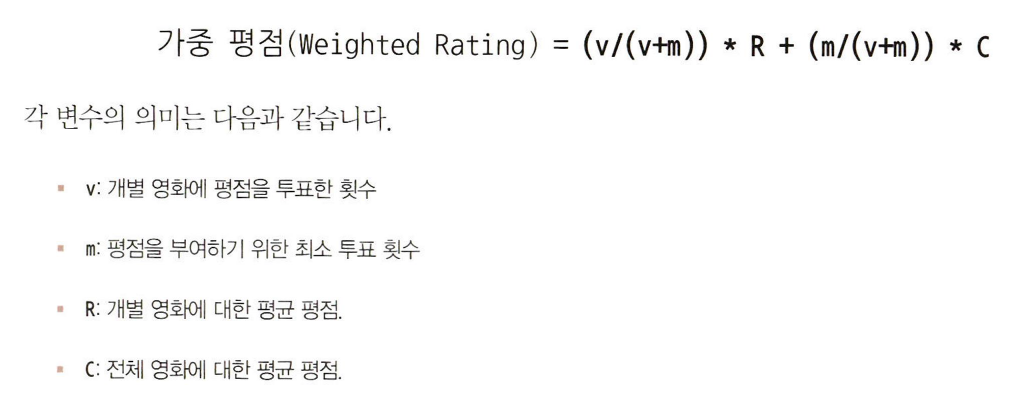

In [17]:
C = movies_df['vote_average'].mean()
m = movies_df['vote_count'].quantile(0.6)
print('C:',round(C,3), 'm:',round(m,3))

C: 6.092 m: 370.2


In [18]:
percentile = 0.6
m = movies_df['vote_count'].quantile(percentile)
C = movies_df['vote_average'].mean()

def weighted_vote_average(record):
    v = record['vote_count']
    R = record['vote_average']
    
    return ( (v/(v+m)) * R ) + ( (m/(m+v)) * C )   

movies_df['weighted_vote'] = movies_df.apply(weighted_vote_average, axis=1)

In [19]:
movies_df[['title','vote_average','weighted_vote','vote_count']].sort_values('weighted_vote', ascending=False)[:10]

,title,vote_average,weighted_vote,vote_count
1881,The Shawshank Redemption,8.5,8.396052,8205
3337,The Godfather,8.4,8.263591,5893
662,Fight Club,8.3,8.216455,9413
3232,Pulp Fiction,8.3,8.207102,8428
65,The Dark Knight,8.2,8.136930,12002
1818,Schindler's List,8.3,8.126069,4329
3865,Whiplash,8.3,8.123248,4254
809,Forrest Gump,8.2,8.105954,7927
2294,Spirited Away,8.3,8.105867,3840
2731,The Godfather: Part II,8.3,8.079586,3338


top_n의 2배만큼의 영화를 후보로 선정한 다음 weighted_vote값이 높은 top_n개만 추출

In [20]:
def find_sim_movie(df, sorted_ind, title_name, top_n=10):
    title_movie = df[df['title'] == title_name]
    title_index = title_movie.index.values
    
    # top_n의 2배에 해당하는 쟝르 유사성이 높은 index 추출
    similar_indexes = sorted_ind[title_index, :(top_n*2)]
    similar_indexes = similar_indexes.reshape(-1)
    similar_indexes = similar_indexes[similar_indexes != title_index] # 기준 영화 index는 제외
    
    # top_n의 2배에 해당하는 후보군에서 weighted_vote 높은 순으로 top_n 만큼 추출 
    return df.iloc[similar_indexes].sort_values('weighted_vote', ascending=False)[:top_n]

similar_movies = find_sim_movie(movies_df, genre_sim_sorted_ind, 'The Godfather',10)
similar_movies[['title', 'vote_average', 'weighted_vote']]

,title,vote_average,weighted_vote
2731,The Godfather: Part II,8.3,8.079586
1847,GoodFellas,8.2,7.976937
3866,City of God,8.1,7.759693
1663,Once Upon a Time in America,8.2,7.657811
883,Catch Me If You Can,7.7,7.557097
281,American Gangster,7.4,7.141396
4041,This Is England,7.4,6.739664
1149,American Hustle,6.8,6.717525
1243,Mean Streets,7.2,6.626569
2839,Rounders,6.9,6.530427


훨씬 개선되었으나, 장르와 평점만으로 추천하는 데에 한계가 있음 => 아이템 기반 추천